In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
student_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/EDA_prjt/COVID-19 Survey Student Responses.csv")

In [3]:
student_df.head(5)

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [ ]:
student_df.info()

#From info we came to know that "Time spent on TV" is in object data type

## lets check its values

In [ ]:
student_df["Time spent on TV"].value_counts()

# Yes...It seems to be instead of Zero hours, some members given N, n..
## We will convert it into proper data type which is Float.


In [ ]:
for i in range(len(student_df["Time spent on TV"])):

  try:
   if (float(student_df["Time spent on TV"][i])/ float(student_df["Time spent on TV"][i]) == 1):
     student_df["Time spent on TV"][i]= float(student_df["Time spent on TV"][i])
     
  except ZeroDivisionError :
    student_df["Time spent on TV"][i]= 0     
  except TypeError :
    student_df["Time spent on TV"][i]= 0
  except ValueError :
    student_df["Time spent on TV"][i]= 0  
 

In [8]:
student_df["Time spent on TV"].value_counts()

0.00     454
1.00     306
2.00     207
0.50      78
3.00      50
4.00      24
1.50      14
0.30      12
5.00      10
6.00       9
0.10       4
8.00       2
7.00       2
4.50       2
2.50       2
3.50       1
0.40       1
15.00      1
0.75       1
0.25       1
0.60       1
Name: Time spent on TV, dtype: int64

In [9]:
student_df["Time spent on TV"]= student_df["Time spent on TV"].astype(float)

In [10]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

#Finally Converted the Object datatype to Float datatype for Time spent on TV

# Then When we check the values of prefered  Social media platfoms.....

In [11]:
student_df ["Prefered social media platform"].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

#There are different Social media platforms being used but we consider only the popular ones and rest we will assign as others
##Here is the list of consideration
###Instagram, Whatsapp, Youtube, Linkedin, Facebook, Twitter, None, Others

In [12]:

for i in range(len(student_df ["Prefered social media platform"])):
  if student_df ["Prefered social media platform"][i].lower().strip() in ['instagram', 'whatsapp', 'youtube','linkedin', 'facebook', 'twitter', 'none']:
    student_df ["Prefered social media platform"][i]= student_df ["Prefered social media platform"][i].upper().strip()
  else:
    student_df ["Prefered social media platform"][i]= "OTHERS"   
print(student_df ["Prefered social media platform"])

0        LINKEDIN
1         YOUTUBE
2        LINKEDIN
3       INSTAGRAM
4       INSTAGRAM
          ...    
1177    INSTAGRAM
1178     WHATSAPP
1179      YOUTUBE
1180      YOUTUBE
1181     WHATSAPP
Name: Prefered social media platform, Length: 1182, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
student_df ["Prefered social media platform"].value_counts()

INSTAGRAM    352
WHATSAPP     337
YOUTUBE      314
LINKEDIN      61
FACEBOOK      52
TWITTER       28
OTHERS        20
NONE          18
Name: Prefered social media platform, dtype: int64

#For "What you miss most" we wll check the unique results

In [14]:
student_df ["What you miss the most"].value_counts()

School/college                                                                                                                                                                                                              379
Friends , relatives                                                                                                                                                                                                         223
Travelling                                                                                                                                                                                                                  183
Roaming around freely                                                                                                                                                                                                       149
Eating outside                                                                                          

#It Seems to be there are lot of people  missing too many things :P
# We will try to separate  results into three main categories
#1) People
#2) Travel
#3) Eating
#4) All
#5) Others

##Trigger_words
###people= 'friends', 'relative', 'colleagues', 'family', 'people', 'social', 'school', 'college', 'relatives'
###travel= 'travelling', 'roaming', 'metro', 'romaing', 'going'
###eating= 'eating', ' eat'
###all= 'all', 'normal', 'everything'

In [15]:
people= 'friends', 'relative', 'colleagues', 'family', 'people', 'social', 'school', 'college','relatives'
travel= 'travelling', 'roaming', 'metro', 'romaing', 'going'
eating= 'eating', ' eat'
all= 'all', 'normal', 'everything'
l=list(student_df ["What you miss the most"].unique())

In [16]:
a=[]
c=[]
for i in l:
  x= re.split(', |,| , |  |/| ', i.strip())  
  b=[] 
  for j in x:     
    if j.lower() in people:
      b.append("people")      
    elif j.lower() in  travel:
      b.append("travel")      
    elif j.lower() in  eating:
      b.append("eating") 
    elif j.lower() in  all:
      b.append("all")         
    else:
      b.append("others") 
  a.append(b)
for i in range(len(a)):  
   if ("people" in a[i]) & ("travel" in a[i]) :
     c.append("all")
     continue
   if  ("people" in a[i]) & ("eating" in a[i]):
     c.append("all")
     continue
   if  ("travel" in a[i]) & ("eating" in a[i]):
     c.append("all")
     continue
   if "all" in a[i]:
     c.append("all") 
     continue
   if ("people" in a[i]):
     c.append("people")
     continue
   if ("travel" in a[i]):
     c.append("travel")  
     continue
   if ("eating" in a[i]):
     c.append("eating") 
     continue 
   else:
     c.append("others")    


In [ ]:
for i in range(len(c)):
  print(l[i],"---",c[i])

##It Seems to be that our category seperation is a blockbuster success.
## We will implement in actual dataframe then...

In [18]:
a=[]
c=[]
for i in student_df ["What you miss the most"]:
  x= re.split(', |,| , |  |/| ', i.strip())  
  b=[] 
  for j in x:     
    if j.lower() in people:
      b.append("people")      
    elif j.lower() in  travel:
      b.append("travel")      
    elif j.lower() in  eating:
      b.append("eating") 
    elif j.lower() in  all:
      b.append("all")         
    else:
      b.append("others") 
  a.append(b)
for i in range(len(a)):  
   if ("people" in a[i]) & ("travel" in a[i]) :
     c.append("all")
     continue
   if  ("people" in a[i]) & ("eating" in a[i]):
     c.append("all")
     continue
   if  ("travel" in a[i]) & ("eating" in a[i]):
     c.append("all")
     continue
   if "all" in a[i]:
     c.append("all") 
     continue
   if ("people" in a[i]):
     c.append("people")
     continue
   if ("travel" in a[i]):
     c.append("travel")  
     continue
   if ("eating" in a[i]):
     c.append("eating") 
     continue 
   else:
     c.append("others")    


In [20]:
len(c)

1182

In [21]:
student_df ["What you miss the most"]= c

In [22]:
student_df["What you miss the most"].value_counts()

people    678
travel    334
eating    105
all        33
others     32
Name: What you miss the most, dtype: int64

In [ ]:
student_df.head()

#We found that "Online class Rating" and "Medium of online class" has some missing values.

#As Online class is Ordianl Qualitative data, We will fill the Missing value with Median value

#As for the "Medium of online class" falls under Nominal Categorical data, We will fill the missing value by Mode value 

In [24]:
student_df ["Rating of Online Class experience"].value_counts()

Very poor    413
Average      387
Good         230
Excellent     98
Poor          30
Name: Rating of Online Class experience, dtype: int64

##Very Poor -1
##Poor-2
##Average- 3
##Good-4
##Excellent- 5
## If we convert these categories into Number and arrange it in order, then we can find the median(Middle Value).
### Its clearly visible that the middle value is "Average".
### Very poor + Poor= 443 (< 50% of data)
### Very poor + Poor + Average = 830 (nearly 70% of data)
## Filling Missing Review with "Average"


In [25]:
student_df ["Rating of Online Class experience"].fillna("Average", inplace= True)

In [26]:
student_df ["Rating of Online Class experience"].unique()

array(['Good', 'Excellent', 'Very poor', 'Average', 'Poor'], dtype=object)

In [27]:
student_df ["Medium for online class"].unique()

array(['Laptop/Desktop', 'Smartphone', 'Tablet', nan, 'Any Gadget',
       'Smartphone or Laptop/Desktop'], dtype=object)

In [28]:
student_df ["Medium for online class"].value_counts()

Laptop/Desktop                  545
Smartphone                      539
Tablet                           37
Smartphone or Laptop/Desktop      5
Any Gadget                        5
Name: Medium for online class, dtype: int64

#As Laptop/Desktop  has highest count value, We will fill the missing value with Laptop/Desktop

In [29]:
student_df ["Medium for online class"].fillna("Laptop/Desktop", inplace= True)

In [30]:
student_df ["Medium for online class"].unique()

array(['Laptop/Desktop', 'Smartphone', 'Tablet', 'Any Gadget',
       'Smartphone or Laptop/Desktop'], dtype=object)

In [31]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1182 non-null   object 
 5   Medium for online class                                                             1182 non-null

In [32]:
student_df.head(5)

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,LINKEDIN,1.0,4,Increased,NO,Cooking,YES,YES,people
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,YOUTUBE,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,travel
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,LINKEDIN,0.0,3,Remain Constant,NO,Listening to music,NO,YES,travel
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,INSTAGRAM,0.0,3,Decreased,NO,Watching web series,NO,NO,people
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,INSTAGRAM,1.0,4,Remain Constant,NO,Social Media,NO,NO,travel


#For analysis purpose we will create some columns

###Extra coaching & Teaching

In [33]:
extra_tusion= []
for i in range(len(student_df.ID)):
  if (student_df["Time spent on Online Class"][i] < 6.0) & (student_df["Rating of Online Class experience"][i] in ['Very poor', 'Poor','Average']):
    extra_tusion.append(1)
   
  else:
    extra_tusion.append(0)
 


In [34]:
len(extra_tusion)

1182

In [35]:
extra_tusion.count(1)

745

In [37]:
extra_tusion.count(0)

437

In [38]:
student_df["Extra_coaching"]= extra_tusion

In [39]:
student_df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Extra_coaching
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,LINKEDIN,1.0,4,Increased,NO,Cooking,YES,YES,people,0
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,YOUTUBE,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,travel,0
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,LINKEDIN,0.0,3,Remain Constant,NO,Listening to music,NO,YES,travel,0
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,INSTAGRAM,0.0,3,Decreased,NO,Watching web series,NO,NO,people,1
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,INSTAGRAM,1.0,4,Remain Constant,NO,Social Media,NO,NO,travel,0


###Extra Mentoring

In [40]:
extra_mentor= []
for i in range(len(student_df.ID)):
  #print(student_df["Time spent on self study"][i],"=====", student_df["Time utilized"][i] )
  if (student_df["Time spent on self study"][i] < 3.0) & (student_df["Time utilized"][i] == "NO"):
    extra_mentor.append(1)
    #print(student_df["Time spent on self study"][i],"=====", student_df["Time utilized"][i] )
   
  else:
    extra_mentor.append(0)

4.0 ===== YES
0.0 ===== YES
3.0 ===== NO
2.0 ===== NO
2.0 ===== NO
3.0 ===== NO
6.0 ===== NO
2.0 ===== NO
2.0 ===== NO
1.0 ===== NO
1.0 ===== NO
4.0 ===== NO
1.0 ===== NO
1.0 ===== NO
3.0 ===== NO
0.0 ===== YES
0.0 ===== NO
0.0 ===== NO
2.0 ===== YES
1.0 ===== NO
1.0 ===== NO
3.0 ===== YES
0.0 ===== NO
0.0 ===== NO
2.0 ===== NO
2.0 ===== NO
4.0 ===== NO
2.0 ===== YES
5.0 ===== YES
2.0 ===== YES
1.0 ===== NO
1.0 ===== NO
2.0 ===== YES
4.0 ===== YES
2.0 ===== YES
5.0 ===== NO
6.0 ===== NO
4.0 ===== YES
6.0 ===== NO
5.0 ===== YES
18.0 ===== YES
5.0 ===== YES
1.0 ===== YES
6.0 ===== YES
2.0 ===== NO
2.0 ===== NO
1.0 ===== NO
1.0 ===== NO
2.0 ===== NO
2.0 ===== NO
2.0 ===== NO
2.0 ===== NO
8.0 ===== NO
4.0 ===== YES
0.0 ===== YES
2.0 ===== NO
2.0 ===== NO
3.0 ===== NO
2.0 ===== NO
2.0 ===== NO
2.0 ===== NO
2.0 ===== NO
6.0 ===== YES
3.0 ===== NO
4.0 ===== YES
2.0 ===== YES
1.0 ===== NO
1.0 ===== NO
6.0 ===== NO
17.0 ===== NO
2.0 ===== YES
4.0 ===== YES
2.0 ===== YES
2.0 ===== NO
2.0 ===== N

In [41]:
len(extra_mentor)

1182

In [42]:
extra_mentor.count(1)

363

In [43]:
extra_mentor.count(0)

819

In [44]:
student_df["Extra_mentoring"]= extra_mentor

In [45]:
student_df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Extra_coaching,Extra_mentoring
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,LINKEDIN,1.0,4,Increased,NO,Cooking,YES,YES,people,0,0
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,YOUTUBE,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,travel,0,0
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,LINKEDIN,0.0,3,Remain Constant,NO,Listening to music,NO,YES,travel,0,0
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,INSTAGRAM,0.0,3,Decreased,NO,Watching web series,NO,NO,people,1,1
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,INSTAGRAM,1.0,4,Remain Constant,NO,Social Media,NO,NO,travel,0,0


##Personal Trainer

In [46]:
prsnl_trainer= []

In [47]:
for i in range(len(student_df.ID)):
  
  if (student_df["Time spent on fitness"][i] < 1.0) & (student_df["Change in your weight"][i] == "Increased"):
    prsnl_trainer.append(1)
   
   
  else:
    prsnl_trainer.append(0)

In [48]:
len(prsnl_trainer)

1182

In [49]:
prsnl_trainer.count(1)

203

In [50]:
prsnl_trainer.count(0)

979

In [51]:
student_df["prsnl_trainer"]= prsnl_trainer



```
# This is formatted as code
```

##Online-Consulting

In [56]:
onlin_cons=[]

In [57]:
for i in range(len(student_df.ID)):
  
  if (student_df["Health issue during lockdown"][i] == "YES") or (student_df["Change in your weight"][i] == "Decreased"):
    onlin_cons.append(1)
   
   
  else:
    onlin_cons.append(0)
print(len(onlin_cons), onlin_cons.count(1), onlin_cons.count(0))    

1182 320 862


In [58]:
student_df["onlin_cons"]= onlin_cons

##Digital_use

In [59]:
student_df ["Stress busters"].unique()

array(['Cooking', 'Scrolling through social media', 'Listening to music',
       'Watching web series', 'Social Media',
       'Coding and studying for exams', 'Online surfing',
       'live stream watching', 'Reading', 'Online gaming',
       'Reading books', 'Dancing', 'Talking with friends ',
       'Talking to your relatives',
       'sketching,reading books,meditation,songs',
       'Watching orgasm releasing videos', 'Sleep', 'Crying',
       'Many of these', 'Web Series', 'drawing ', 'Meditation', 'Cricket',
       'Anime Manga', 'Sleeping', 'Sketching and writing', 'Writing',
       'pubg', 'Talking', 'Workout ', 'Whatever want', 'Indoor Games',
       'watching movies,reading books,games,listening to music,sleep,dancing',
       'gardening cartoon',
       'listening to music,reading books and dancing.',
       'Dont get distreessed',
       ' listening music, motion design, graphic design, sleeping.',
       'Business', 'Many among these ', 'Talk with childhood friends.',
   

In [60]:
digital_key= ["media", "music", "web", "series","Coding", "Online","stream", "gaming","songs","videos","Manga","anime","pubg","movies", 'cartoon',"game",'design',"Netflix",'watching' ]

In [61]:
for i in range(len(digital_key)):
  digital_key[i]= digital_key[i].lower()
digital_key  

['media',
 'music',
 'web',
 'series',
 'coding',
 'online',
 'stream',
 'gaming',
 'songs',
 'videos',
 'manga',
 'anime',
 'pubg',
 'movies',
 'cartoon',
 'game',
 'design',
 'netflix',
 'watching']

In [62]:
digital_use= []
for i in student_df ["Stress busters"]:
  x= re.split(', |,| , |  |/| ', i.strip())
  a=0
  for i in digital_key:
    if i in x:
      digital_use.append(1)
      break
    a+=1  
  if a == len(digital_key):
    digital_use.append(0) 
print(len(digital_use),digital_use.count(0), digital_use.count(1))     

1182 539 643


In [63]:
student_df["digital_use"]= digital_use

In [64]:
student_df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Extra_coaching,Extra_mentoring,prsnl_trainer,onlin_cons,digital_use
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,LINKEDIN,1.0,4,Increased,NO,Cooking,YES,YES,people,0,0,1,0,0
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,YOUTUBE,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,travel,0,0,0,1,1
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,LINKEDIN,0.0,3,Remain Constant,NO,Listening to music,NO,YES,travel,0,0,0,0,1
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,INSTAGRAM,0.0,3,Decreased,NO,Watching web series,NO,NO,people,1,1,0,1,1
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,INSTAGRAM,1.0,4,Remain Constant,NO,Social Media,NO,NO,travel,0,0,0,0,0


##meal offers

In [67]:
meals=[]
for i in range(len(student_df.ID)):
  
  if ((student_df["Number of meals per day"][i] >2) & (student_df["digital_use"][i] == 1)) or (student_df["What you miss the most"][i] == 'eating'):
    meals.append(1)
   
   
  else:
    meals.append(0)
print(len(meals),meals.count(0), meals.count(1))     

1182 657 525


In [68]:
student_df["meal_offer"]= meals

##socialize_add

In [69]:
soc_add=[]

for i in range(len(student_df.ID)):
  
  if student_df["What you miss the most"][i] == 'people':
    soc_add.append(1)
   
   
  else:
    soc_add.append(0)
print(len(soc_add),soc_add.count(0), soc_add.count(1)) 


1182 504 678


In [70]:
student_df["socil_add"]= soc_add

##travel

In [71]:
trvl_add=[]

for i in range(len(student_df.ID)):
  
  if student_df["What you miss the most"][i] == 'travel':
    trvl_add.append(1)
   
  else:
    trvl_add.append(0)
print(len(trvl_add),trvl_add.count(0), trvl_add.count(1))

1182 848 334


In [72]:
student_df["trvl_add"]= trvl_add

In [73]:
student_df["trvl_add"].value_counts()

0    848
1    334
Name: trvl_add, dtype: int64

##Plots

In [ ]:
sns.swarmplot(y='Time spent on Online Class', x='Rating of Online Class experience', data=student_df);

In [ ]:
sns.jointplot(y='Time spent on Online Class', x='Time spent on self study', data=student_df );

In [ ]:
sns.jointplot(y='digital_use', x='Prefered social media platform', data= student_df);

In [ ]:

student_df.head()

In [78]:
c= student_df.groupby("Prefered social media platform")["Prefered social media platform"].count()

In [79]:
c

Prefered social media platform
FACEBOOK      52
INSTAGRAM    352
LINKEDIN      61
NONE          18
OTHERS        20
TWITTER       28
WHATSAPP     337
YOUTUBE      314
Name: Prefered social media platform, dtype: int64

In [80]:
c["OTHERS"]= c["LINKEDIN"] + c["TWITTER"] +c["NONE"] +c["OTHERS"]
c.drop(index= ['LINKEDIN','TWITTER','NONE'], inplace= True)

In [81]:
c

Prefered social media platform
FACEBOOK      52
INSTAGRAM    352
OTHERS       127
WHATSAPP     337
YOUTUBE      314
Name: Prefered social media platform, dtype: int64

In [ ]:
sns.barplot(x= c.index,y=c.values )

In [100]:
cd= pd.crosstab(student_df["Prefered social media platform"], student_df["digital_use"])

In [101]:
cd

digital_use,0,1
Prefered social media platform,,
FACEBOOK,26,26
INSTAGRAM,136,216
LINKEDIN,32,29
NONE,12,6
OTHERS,11,9
TWITTER,14,14
WHATSAPP,166,171
YOUTUBE,142,172


In [102]:
cd.loc["OTHERS",:]= cd.loc["LINKEDIN",:] + cd.loc["TWITTER",:] +cd.loc["NONE",:] +cd.loc["OTHERS",:]
cd.drop(index= ['LINKEDIN','TWITTER','NONE'], inplace= True)
cd


digital_use,0,1
Prefered social media platform,,
FACEBOOK,26,26
INSTAGRAM,136,216
OTHERS,69,58
WHATSAPP,166,171
YOUTUBE,142,172


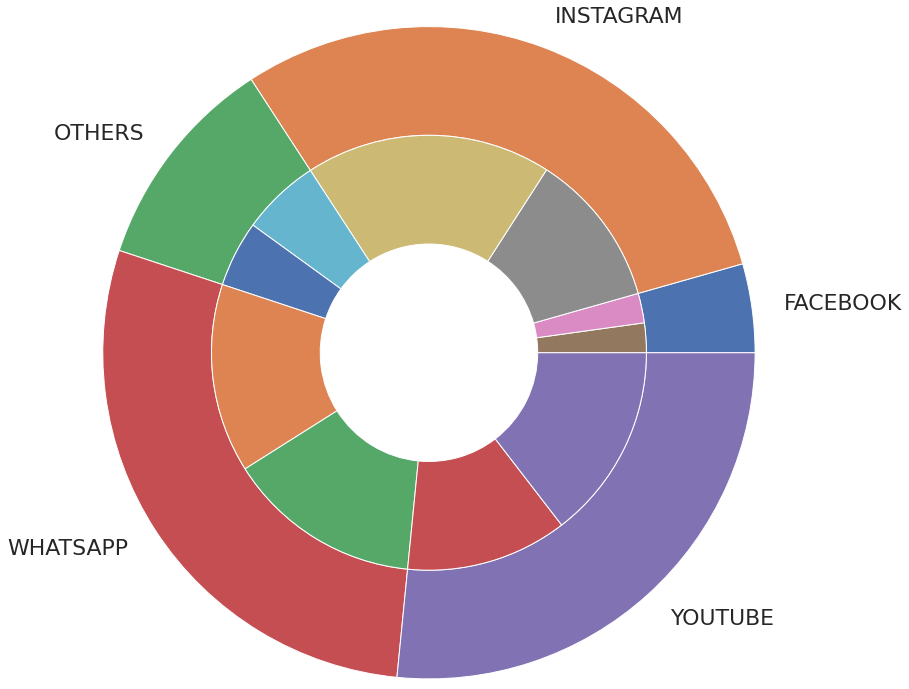

In [103]:
plt.pie(cd.sum(axis =1), labels= cd.index, radius= 1.5, wedgeprops= dict(width= 0.5) )
plt.pie(cd.values.flatten(), radius=1, 
        wedgeprops=dict(width=0.5));

In [104]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0, 4, 8,12,16,20]))
inner_colors = cmap(np.array([1,3,5,7,9,11,13,15,17,19]))

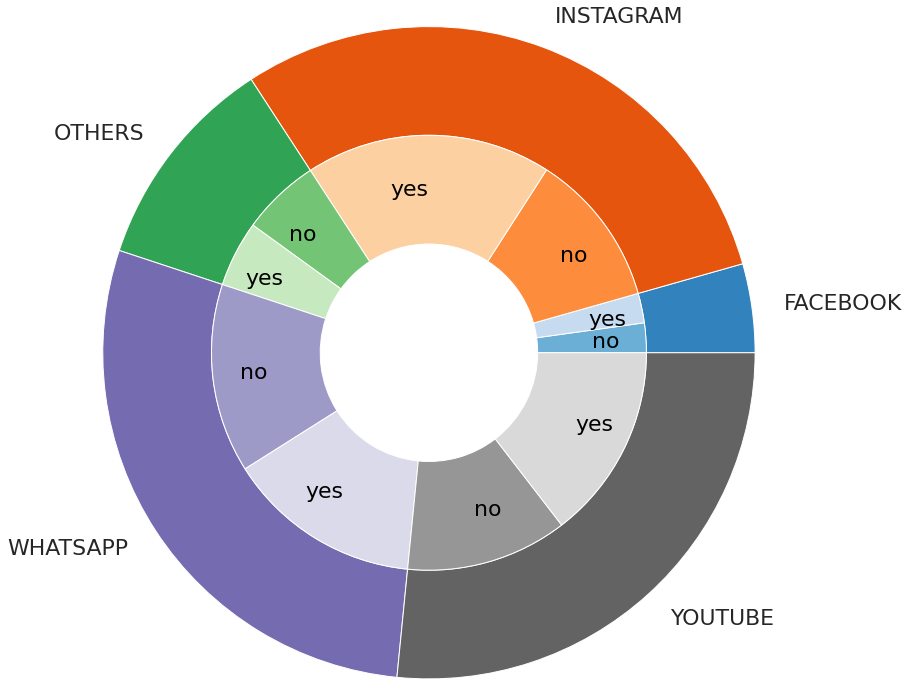

In [105]:
plt.pie(cd.sum(axis =1), labels= cd.index, radius= 1.5, wedgeprops= dict(width= 0.5),colors=outer_colors )
plt.pie(cd.values.flatten(), radius=1, 
        wedgeprops=dict(width=0.5),labels=['no','yes','no','yes','no','yes','no','yes','no','yes'], colors=inner_colors, labeldistance=0.75, textprops=dict(color='black'));
sns.set(rc= {'figure.figsize': (15,10)}, font_scale=2)        

In [106]:
cd.reset_index(inplace= True)
cd

digital_use,Prefered social media platform,0,1
0,FACEBOOK,26,26
1,INSTAGRAM,136,216
2,OTHERS,69,58
3,WHATSAPP,166,171
4,YOUTUBE,142,172


In [108]:
cd.rename(columns={'digital_use':"Index","Prefered social media platform" :'Prefered social media', 0:"No",1:"Yes"}, inplace= True)

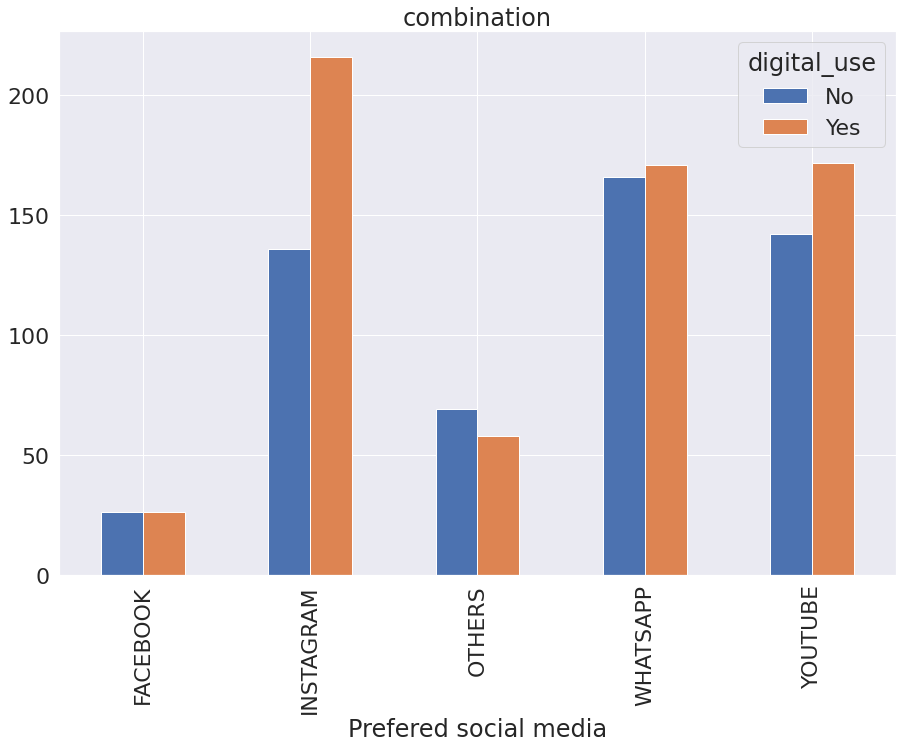

In [109]:
cd.plot(x= "Prefered social media", kind= 'bar', stacked= False, title= "combination")


In [110]:
cd["engagement_per"]= cd['Yes']/1182
cd

digital_use,Prefered social media,No,Yes,engagement_per
0,FACEBOOK,26,26,0.021997
1,INSTAGRAM,136,216,0.182741
2,OTHERS,69,58,0.049069
3,WHATSAPP,166,171,0.144670
4,YOUTUBE,142,172,0.145516


In [117]:
student_df.columns.values

array(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day',
       'Change in your weight', 'Health issue during lockdown',
       'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most', 'Extra_coaching', 'Extra_mentoring',
       'prsnl_trainer', 'onlin_cons', 'digital_use', 'meal_offer',
       'socil_add', 'trvl_add'], dtype=object)

In [ ]:
'ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day',
       'Change in your weight', 'Health issue during lockdown',
       'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most', 

In [137]:
y=['Extra_coaching', 'Extra_mentoring',
       'prsnl_trainer', 'onlin_cons', 'digital_use', 'meal_offer',
       'socil_add', 'trvl_add']
x1= ['Age of Subject', 'Time spent on Online Class', 'Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness','Time spent on sleep']
x2= ['Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day',
       'Change in your weight', 'Health issue during lockdown',
       'Stress busters'] 
x3=  ['Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?','What you miss the most']


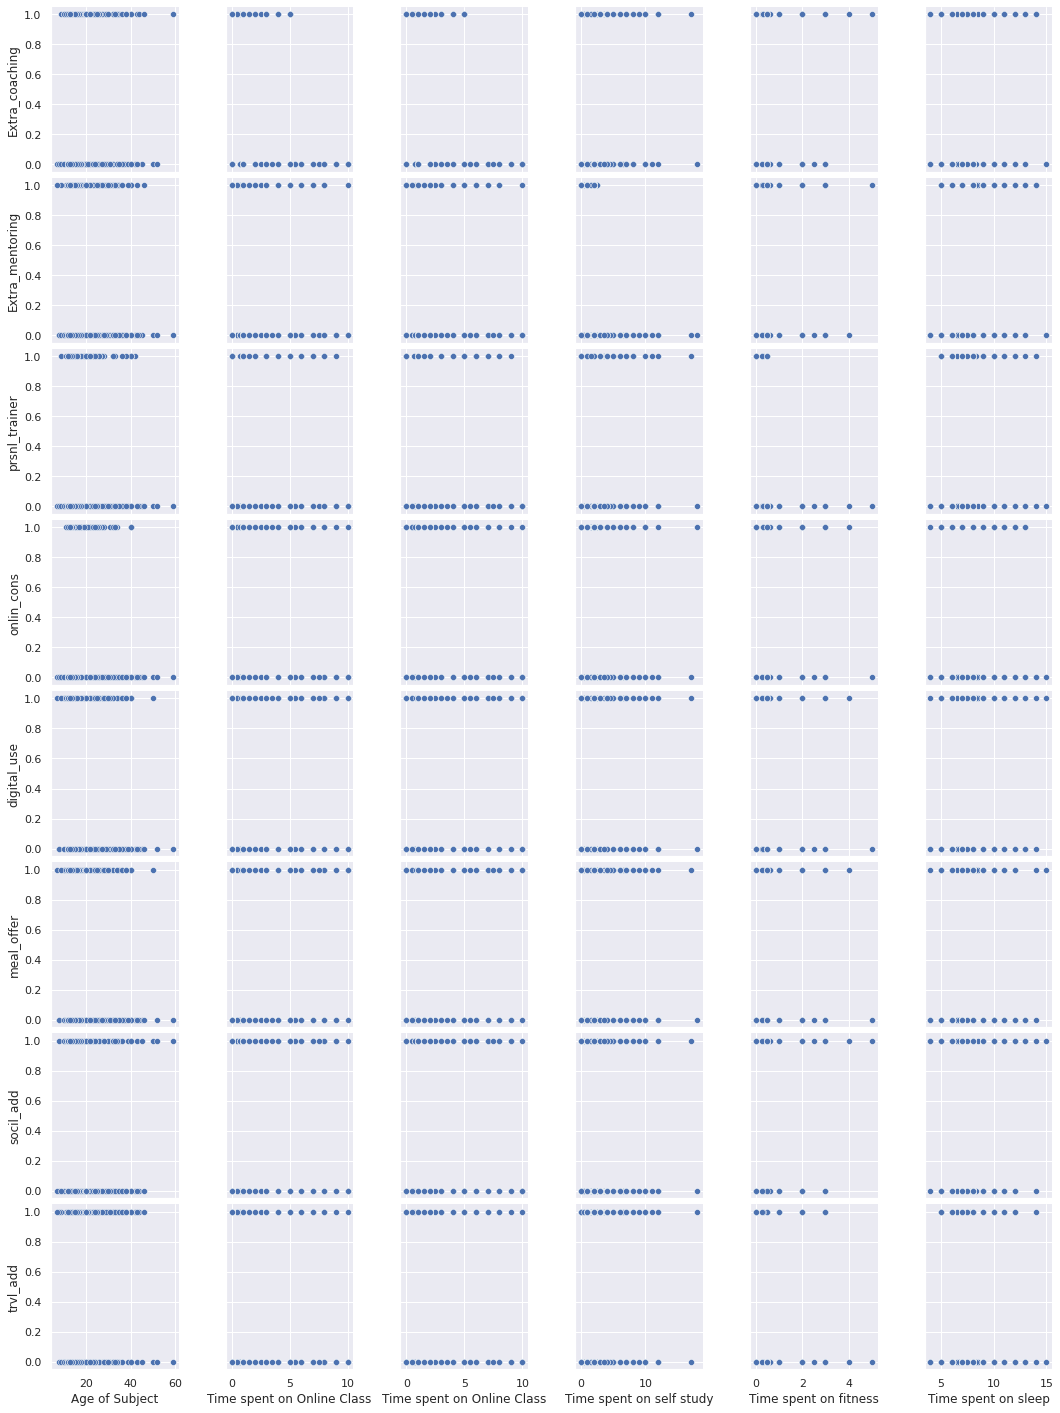

In [140]:
p= sns.pairplot(student_df, x_vars= x1, y_vars= y)
sns.set(rc= {'figure.figsize': (35,60)})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


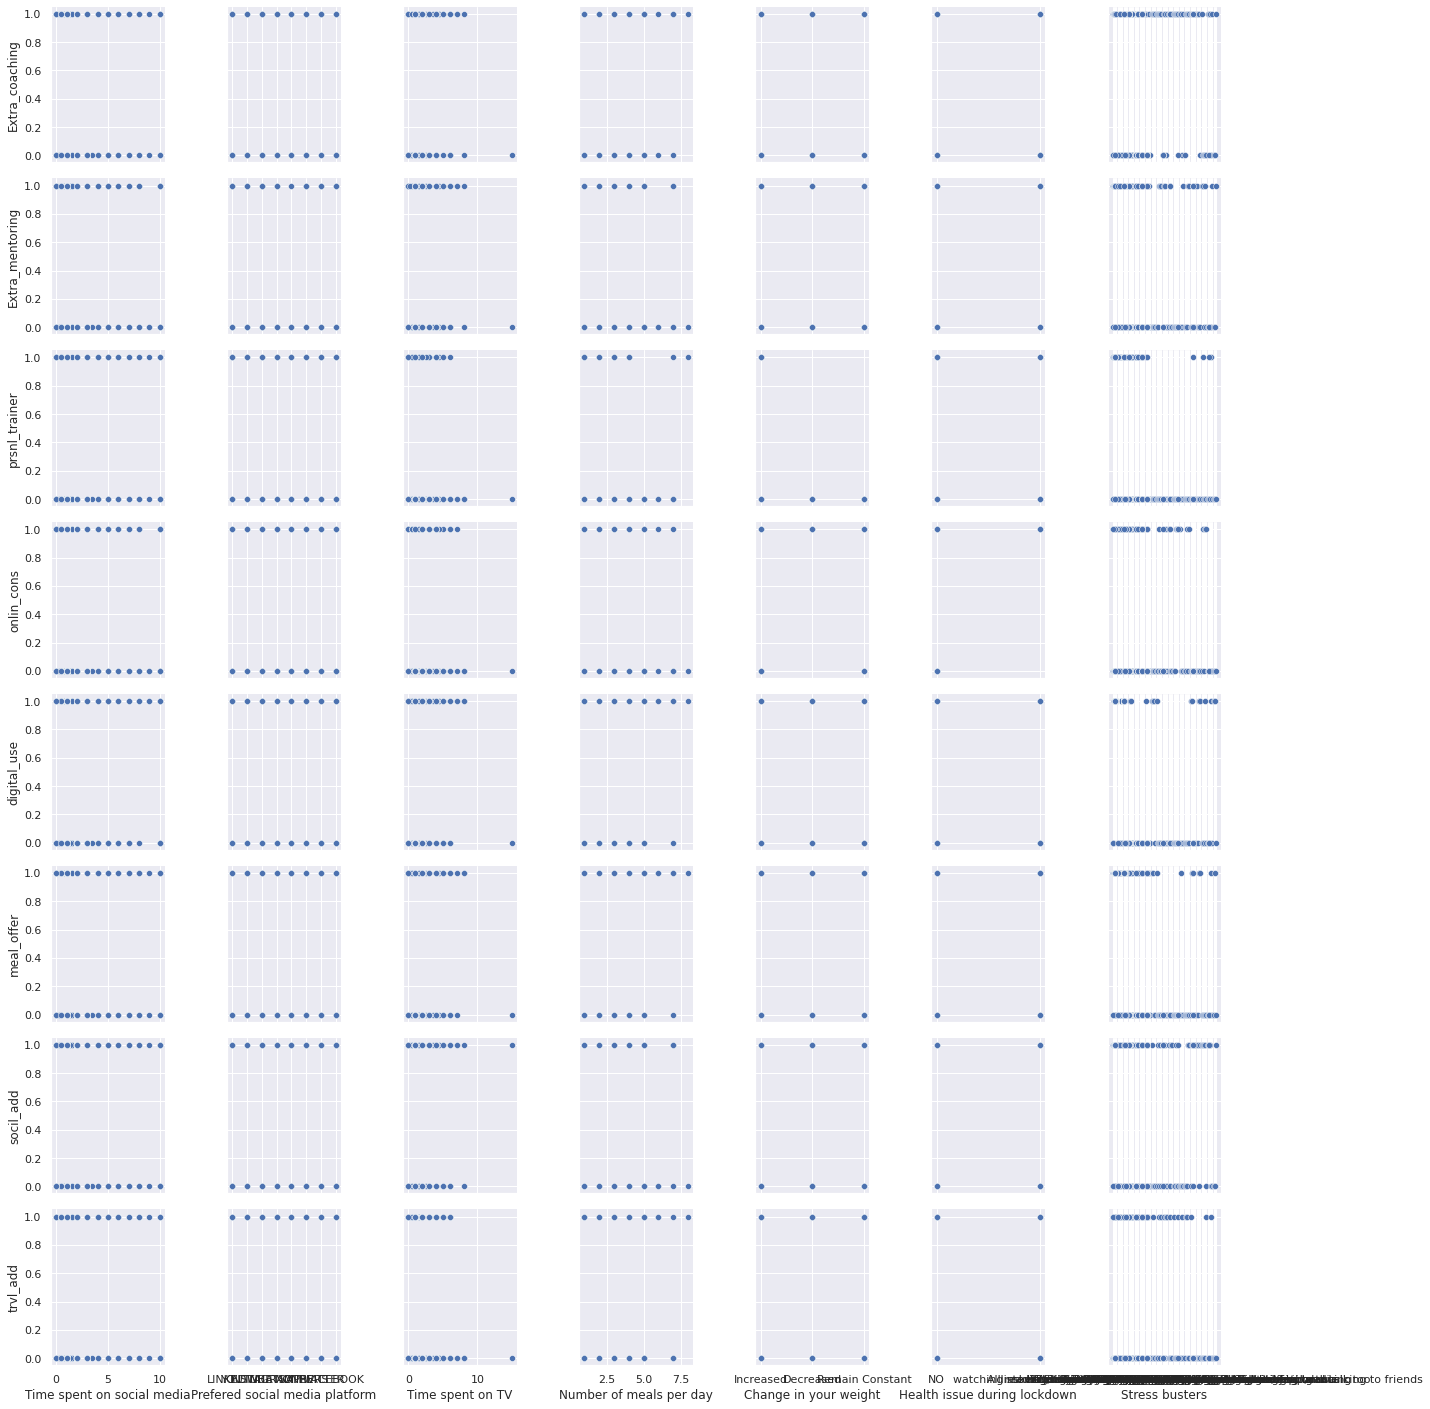

In [139]:
p= sns.pairplot(student_df, x_vars= x2, y_vars= y)
sns.set(rc= {'figure.figsize': (35,60)}) 


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


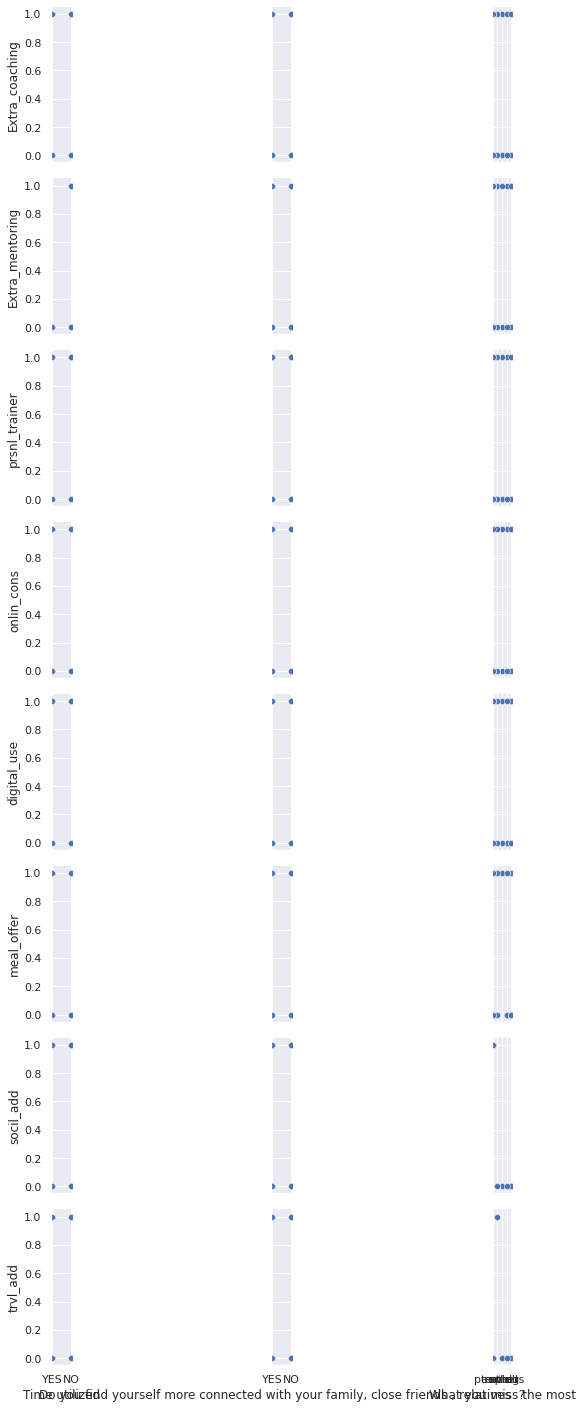

In [141]:
p= sns.pairplot(student_df, x_vars= x3, y_vars= y)
sns.set(rc= {'figure.figsize': (35,60)})

#REPORTS

In [ ]:
 ! pip install sweetviz
 import sweetviz as sv
 report= sv.analyze(student_df)
 report.show_html('report.html',open_browser= True)

In [ ]:
# !pip install pandas-profiling[notebook,html]
# import pandas as pd
# from pandas_profiling import ProfileReport

In [ ]:
# pd_report = ProfileReport(student_df, title= "pd_report", explorative= True)
# pd_report.to_file(output_file= "pd_report.html")


#As this is a sample (taken using stratified smapling method). when we estimate the population parameters, we will try to neglect the prescence of skewness. Instead we will use the sample error to find the confidence interval for population parameters.